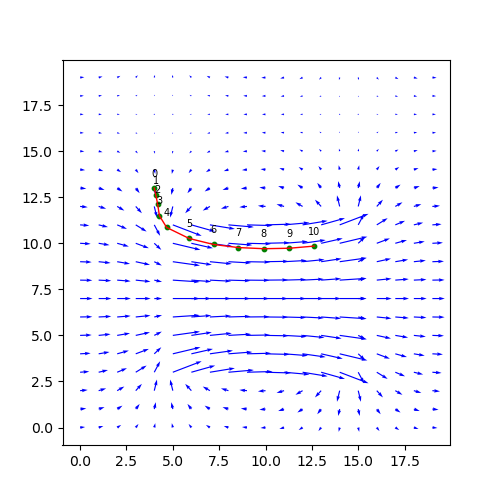

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

height = 20
width = 20
grid = np.zeros(shape=(height,width))

simulator = navier_stokes.Simulator(grid)

for j in range(3, 12):
    for i in range(5,15):
        simulator.force_field[(j,i)] = [0.1, 0]

velocity_field = simulator.step(dt=1)
    
# Plotting junk
X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, velocity_field[:, :, 0], velocity_field[:, :, 1], color="b")
steps = navier_stokes.streamline(pos=np.array([4,13],dtype=np.float64), dt=200, steps=10, vf=velocity_field)
xysteps = np.array(steps).T
plt.plot(xysteps[0], xysteps[1], color="red", linewidth=1)
for i, point in enumerate(steps):
    plt.text(point[0], point[1] + 0.5, str(i), fontsize=7, ha='center', va='bottom')
    plt.scatter(point[0], point[1], color='green', s=10)  # s sets the marker size
plt.show()